In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pepsi_data_path = "food_data_chart.csv"
features = ['Begin', 'End', 'Used', 'Delivery']  # need to add significant dates to the features

pepsi_data = pd.read_csv(pepsi_data_path)

pepsi_data.columns #View data columns
pepsi_data = pepsi_data.dropna(axis=0)
X = pepsi_data[features]
X.head()

,Begin,End,Used,Delivery
0,34.0,5.0,29.0,48.0
1,5.0,25.0,28.0,0.0
2,25.0,20.0,5.0,0.0
3,20.0,20.0,0.0,0.0
4,20.0,0.0,20.0,72.0


In [3]:
pepsi_data = pepsi_data.dropna(axis=0)

In [4]:
# Split the data set into training and test sets 
train_pepsi = pepsi_data.sample(frac=0.8, random_state=0)
test_pepsi = pepsi_data.drop(train_pepsi.index)

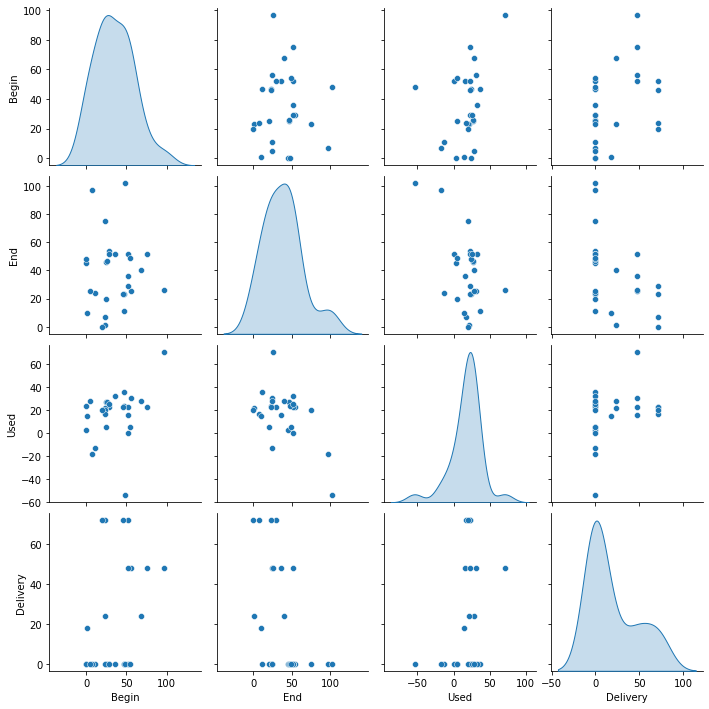

In [5]:
# visualize the data sets to see relationships between features
sns.pairplot(train_pepsi[features], diag_kind='kde')

In [6]:
# Split off prediction data 
features_pepsi = train_pepsi.copy()
features_test = test_pepsi.copy()

train_pepsi = train_pepsi.pop('Delivery')
test_pepsi = test_pepsi.pop('Delivery')


In [12]:
# Normalize data
train_pepsi.describe().transpose()[['mean', 'std']] 
normalizer = tf.keras.layers.Normalization(axis=0)
normalizer.adapt(np.array(train_pepsi))

print(normalizer.mean.numpy())

ValueError: in user code:

    /Users/ani/miniconda3/envs/MLEnv/lib/python3.7/site-packages/keras/engine/base_preprocessing_layer.py:121 adapt_step  *
        self._adapt_maybe_build(data)
    /Users/ani/miniconda3/envs/MLEnv/lib/python3.7/site-packages/keras/engine/base_preprocessing_layer.py:284 _adapt_maybe_build  **
        self.build(data_shape)
    /Users/ani/miniconda3/envs/MLEnv/lib/python3.7/site-packages/keras/layers/preprocessing/normalization.py:148 build
        self.axis, input_shape, d))

    ValueError: All `axis` values to be kept must have known shape. Got axis: (0,), input shape: [None], with unknown axis at index: 0
